In [3]:
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
from keras.optimizers import Adam
import keras.utils as image
import cv2
import datetime
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
model = load_model("maskmodel.h5")

In [5]:
def predictmodel(imagename):
    img = cv2.imread(imagename)
    img = cv2.resize(img,(150,150))
    img_array = np.array(img)
    img_array = img_array.reshape(1,150,150,3)
    a=model.predict(img_array)
    indices = a.argmax()
    labels = ['Mask','No Mask']
    img = image.load_img(imagename)
    plt.imshow(img,interpolation='nearest')
    plt.show()
    return "Prediction : "+labels[indices]

1/1 [==============================] - 0s 466ms/step


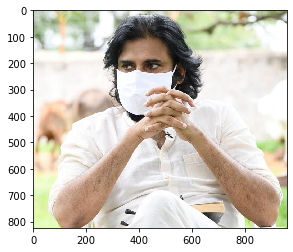

'Prediction : Mask'

In [6]:
predictmodel("mask.jpg")

1/1 [==============================] - 0s 71ms/step


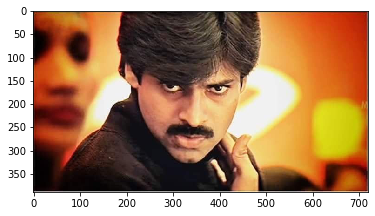

'Prediction : No Mask'

In [7]:
predictmodel("nomask.jpg")

In [9]:
# IMPLEMENTING LIVE DETECTION OF FACE MASK

cap=cv2.VideoCapture("v.mp4")
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while cap.isOpened():
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        test_image=image.load_img('temp.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred=model.predict(test_image)[0][0]
        if pred==1:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(img,'NO MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,'MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
        datet=str(datetime.datetime.now())
        cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
          
    cv2.imshow('img',img)
    
    if cv2.waitKey(1)==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 78ms/step


error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'
